<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1ebbd7;
           font-size:200%;
           font-family:Arial;
           letter-spacing:0.1px">

<p style="padding: 10px;
              color:white;
          text-align:center;">COVID-19 Vaccination progression
</p>
</div>

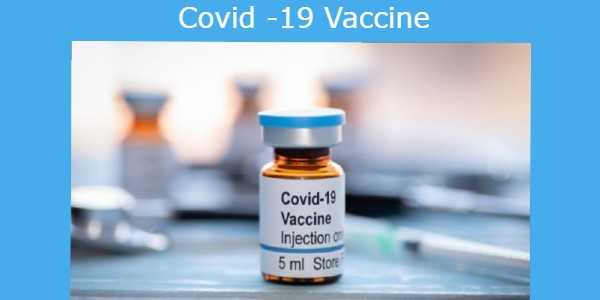

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1ebbd7;
           font-size:200%;
           font-family:Arial;
           letter-spacing:0.1px">

<p style="padding: 10px;
          text-align:center;
          color:white;">Index
</p>
</div>

1. Object of the study
2. Missing values
3. Data cleaning
4. EDA

# <span style="font-family: Arial;font-size:1.2em;color:#006de1">Object of the study

* <span style="font-family: Arial;font-size:1.2em;color:#333333">Which country is using what vaccine?
* <span style="font-family: Arial;font-size:1.2em;color:#333333">In which country the vaccination programme is more advanced?
* <span style="font-family: Arial;font-size:1.2em;color:#333333">Where are vaccinated more people per day? But in terms of percent from entire population ?

In [ ]:
# packages
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

from IPython.display import HTML
import calendar

import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS

# plotly offline
from plotly.offline import download_plotlyjs,init_notebook_mode
init_notebook_mode(connected=True)


In [ ]:
df = pd.read_csv('../input/covid-world-vaccination-progress/country_vaccinations.csv')

# <span style="font-family: Arial;font-size:1.2em;color:#006de1">Missing values

In [ ]:
# Missing value
missing_value = 100 * df.isnull().sum()/len(df)
missing_value = missing_value.reset_index()
missing_value.columns = ['variables','missing values in percentage']

# heatmap
fig = px.imshow(df.isnull().T,template='ggplot2')
fig.update_layout(title='Missing values in data set')
fig.show()

# barplot
fig = px.bar(missing_value, y='missing values in percentage',x='variables',title='Missing values % in each column',
             template='ggplot2');
fig.show()

* <span style="font-family: Arial;font-size:1.2em;color:#333333">Most of the variables have null value off that People_vaccinations_raw and the People_fully_vaccinations_per has the more than 80% of value are missing 
    
* <span style="font-family: Arial;font-size:1.2em;color:#333333"> Daily_vaccinations,total_vaccinations, variables has values missing because if we take the null values and related country and date, we can see the reason is some of the countries does not start vaccinations from date 2020 Dec

# <span style="font-family: Arial;font-size:1.2em;color:#006de1">Data cleaning

* <span style="font-family: Arial;font-size:1.2em;color:#333333">Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset

In [ ]:
df['date'] = df['date'] = pd.to_datetime(df.date)
df['date'] = df['date'].dt.strftime('%m/%d/%Y')

In [ ]:
df.head()

In [ ]:
# Data cleaning for ISO code

df[df['iso_code'].isnull()]['country'].unique()# England, Northern Ireland and Scotland comes under the UK code GBR and Northern cyprus code CYP

In [ ]:
df[df['country'].str.contains('Northern Cyprus')]['iso_code'].fillna('CYP')

df['iso_code'] = df['iso_code'].fillna('GBR')

df['iso_code'].isnull().sum()

In [ ]:
# fillna with zero
df[['daily_vaccinations','total_vaccinations','people_vaccinated',
    'people_fully_vaccinated','daily_vaccinations_raw','daily_vaccinations',
    'total_vaccinations_per_hundred','daily_vaccinations_per_million']] = df[['daily_vaccinations',
                                                                              'total_vaccinations',
                                                                              'people_vaccinated',
                                                                              'people_fully_vaccinated',
                                                                              'daily_vaccinations_raw','daily_vaccinations',
                                                                              'total_vaccinations_per_hundred','daily_vaccinations_per_million']].fillna(0)

# <span style="font-family: Arial;font-size:1.2em;color:#006de1">Which country is using what vaccine?

In [ ]:

df_vaccines = df.groupby(['country','vaccines'])[['people_vaccinated']].max().reset_index()
df_vaccines = df_vaccines.sort_values('people_vaccinated',ascending=False)
df_vaccines.columns = ['Country','Vaccines','Total number of people vaccinated']

fig = px.sunburst(df_vaccines, path=['Vaccines','Country'], values='Total number of people vaccinated',
                  title= 'Which country is using what vaccine?',
                  height=650,color_continuous_scale=px.colors.cyclical.Twilight)



fig.show()

<span style="font-family: Arial;font-size:1.2em;color:#333333">In the above sunburst in the centre, we can see the different type of Vaccines schemes and click on the vaccines to see what countries use the most of it

In [ ]:
plot_vaccines = df.groupby(['vaccines'])[['people_vaccinated']].max().reset_index()
plot_vaccines = plot_vaccines.sort_values('people_vaccinated',ascending=False)
plot_vaccines.columns = ['Vaccines','Total number of people vaccinated']

fig = px.bar(plot_vaccines,x='Vaccines',y='Total number of people vaccinated',
             template='none',title='Top Vaccines',color='Total number of people vaccinated')
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df['vaccines']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for text in range(len(tokens)): 
        tokens[text] = tokens[text].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1200, height = 400, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 20).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = '#6897BB') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('vaccines')  
plt.show() 

#### <span style="font-family: Arial;font-size:1.2em;color:#333333">above word-cloud shows that Pfizer is the most used vaccine in different countries and followed by Oxford AstraZeneca, Sinopharm and V Spuntnik

## <span style="font-family: Arial;font-size:1.2em;color:#006de1">In which country the vaccination programme is more advanced?

In [ ]:
# Top countries in Vaccination

fig = px.bar(df_vaccines[0:24],x='Country',y='Total number of people vaccinated',
             template='none',title='Top countries in Vaccination progress',color='Total number of people vaccinated')
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [ ]:
plot_vac =df.groupby('iso_code')['total_vaccinations'].max().reset_index()

fig = px.choropleth(plot_vac, locations="iso_code",
                    color="total_vaccinations",
                    hover_name="iso_code", 
                    color_continuous_scale=px.colors.sequential.Magma,
                    title ="Total vaccinations in each Country")

fig.update_layout(geo=dict(bgcolor= 'white'))

fig.update_geos(projection_type="natural earth")


fig.show()

* <span style="font-family: Arial;font-size:1.2em;color:#333333">The USA, China and the U.K. are at the top of the vaccination progress

In [ ]:
date_plot = df.sort_values('date',ascending=False)

fig = px.choropleth(date_plot, locations="iso_code",
                    color="daily_vaccinations",
                    animation_frame = 'date',
                    hover_name="country", 
                    title ="Daily vaccinations in each Country")

fig.update_layout(geo=dict(bgcolor= 'White'))

fig.update_geos(projection_type="natural earth")

#fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

* <span style="font-family: Arial;font-size:1.2em;color:#333333">Some of the countries started vaccination program on Dec. 2020 countries like Russia, United States, China, Argentina, Mexico and U.K.

* <span style="font-family: Arial;font-size:1.2em;color:#333333">Some countries started vaccination program in mid of the Jan. 2021 countries like Indonesia, India, United Arab Emirates, Brazil, France and Italy.

In [ ]:
percent_vacc = df.groupby(['country','iso_code']).max().reset_index()
percent_vacc

fig = px.scatter_geo(percent_vacc, locations="iso_code",
                    size="total_vaccinations_per_hundred",
                    color='country',
                    hover_name="country", 
                    color_continuous_scale=px.colors.sequential.Tealgrn,
                    title ="Percentage of people vaccinated per hundred in each Country")

fig.update_layout(geo=dict(bgcolor= '#61efff'))

fig.update_geos(projection_type="natural earth")


fig.show()

# Thanks!
